## Implementing the Convolution Neural Network

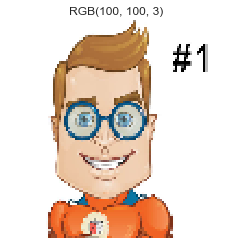

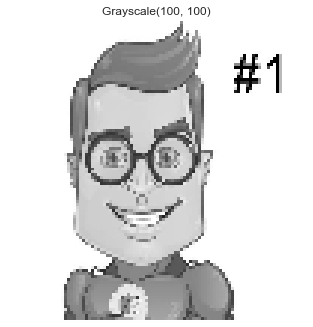

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Defining the a function drawImg as we want to work with many images
def drawImg(img,title="Image"):
    """ Specifying the cmap that we giving the gray scale images"""
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.style.use("seaborn")
    plt.title(title+str(img.shape))
    plt.show()
    
    

    
# cv2 by default read in bgr format hence convert it into rgb for latter use
# Then converting into 100*100 for better operations on the image
img_ = cv2.imread("./cnn_images/cody2.jpg") 
img_ = cv2.resize(img_,(100,100))
img = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
drawImg(img,"RGB")
drawImg(img_gray,"Grayscale")


## We can see the shapes of the first image is 100_100_3 and of second images is 100_100
## As our images is a 3-d image so we also need to have 3-d filter 
## i.e our filter must be of the size  i.e f_f_3 
## hence to avoid this and making it computationaly more efficient we use grayscale image

In [4]:
# Hardcoded filters
# There are many filters in the computer vision one for detecting edges one for curves and many more
# Filter is nothing it is just a matrix which we will convoluve over the entire image

def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    
    """ If we dont apply padding the shape of new image will be n-f+1*n-f+1"""
    """ i.e in the new_img we will storing our activation values"""
    new_img = np.zeros((W-F+1,H-F+1))
    
    
    """ Here the outer two loops iterate over the new_image and inner loop 
      will iterate over the Filter """ 
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                
                """ It might be Possible that while calculating pixel values over a block
                it might become more than 255 but in the rgb all the values must be between
                0 to 255 """
                if new_img[row][col] > 255:
                    new_img[row][col] = 255
                
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
                
                
    """ new_img is the Activation Map"""
    return new_img 

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


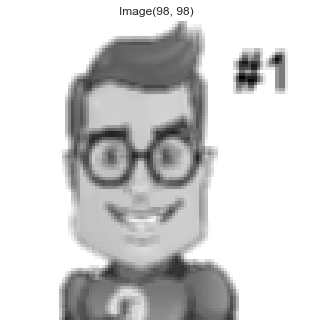

In [6]:
# i.e a filter for blurring the image
blur_filter = np.ones((3,3))/9.0
print(blur_filter)


""" 1/9 is present in blur matrix and we are having 3*3 filter i.e 9 blocks so we are averaging the intensity here"""
output1 = convolution(img_gray,blur_filter)
drawImg(output1)

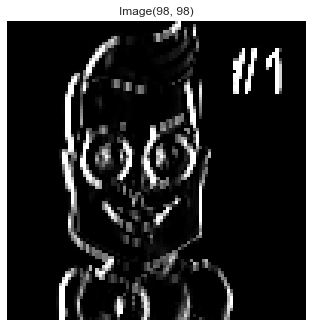

In [7]:
edge_filter = np.array([[1,0,-1],
                       [1,0,-1],
                       [1,0,-1]])

output2 = convolution(img_gray,edge_filter)
drawImg(output2)

## We are explictly defying the filters but when we work with ml in the backpropogation step machine will automatically learn these filters 

## Hence we can say that features act as powerful feature extracter


### Convolution Layer contains various filters ,each filter extracts different kinds of features and gives 1 activation map and multiple activation maps are combined by stacking to form output volume
### so CNN layer takes input a volume and produces an output volume of different shape

In [8]:
""" What filter do was selecting particular kind of feature depending the numeric value present in that matrix"""
""" Each layer in CNN contain multiple features and each feauture will be extracted with some particular feature map
and each feature map produces some activation map"""


""" i.e say we get different feature map for contrast , feature, and shape 
    so we combine them together or stack them together and produce a output volumne"""



""" i.e so we can say that if we have k filters so our output have the shape h*w*k """
""" Hence we can say cnn layer accepts one volume and produces other volume 
    i.e  input to cnn is a input image or a output volumne of other cnn network"""




' Hence we can say cnn layer accepts one volume and produces other volume \n    i.e  input to cnn is a input image or a output volumne of other cnn network'

## Padding using Numpy 

(100, 100, 3)


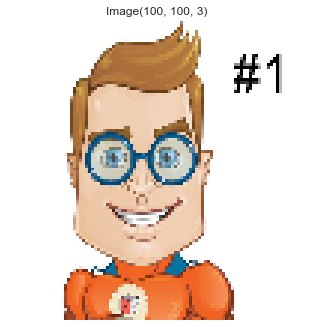

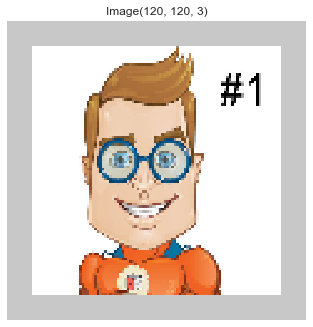

In [9]:
import numpy as np

print(img.shape)
drawImg(img)

# Add Padding to the above image
# ((10,10),(10,10),(0,0)) this is a tuple 10,10 is for the rows 20,20 if for the cols and 0,0 for the depth
# constant_values=200 is for the color of the padding 
pad_img = np.pad(img,((10,10),(10,10),(0,0)),'constant',constant_values=200)
drawImg(pad_img)

### Pooling is performed after Convolution Operation
### Two types of pooling layer - Average Pooling and Max Pooling

### Max-pooling layer: slides an ($f, f$) window over the input and stores the max value of the window in the output.

#### Average-pooling layer: slides an ($f, f$) window over the input and stores the average value of the window in the output.

#### It helps to reduce computation by discarding 75% of the neurons(assuming 2X2 filters with stride of 2)

#### Makes feature detectors more robust
#### No parameters for learning, only hyperparameters such as filter size and type of pooling.